# Classification Metrics
- Measuring Model performance with accuracy :
    - Fraction of correctly classified samples
    - Not always a useful metrics

# Class imbalance
- Classification for predicting fraudulent bank transactions 
    - 99% of transactions are legitimate ; 1% are fraudulent
- Could build a classifier that predicts NONE of the transactions are fraudulent
    - 99% accurate 
    - But terrible at actually predicting fraudulent transactions
    - fails at its original purpose
= Class imbalance : Uneven frequency of classes

# Confusion Matrix of assessing classification performance
- confustion Matrix
- ----------------------------Predicted : Legitimate--------Predicted : fradulent
- Actual : Legitimate---------True Negative-----------------False Positive
- Actual : Fraudulent---------False Negative----------------True Positive

- True Positive : No of Fraudulent transactions correctly Labelled
- True Negative : No of Legitimate transactions correctly Labelled
- False Negative : No of Legitimate transactions incorrectly Labelled
- False Positive : No of Fraudulent transactions incorrectly Labelled

# Why is it important 

### Accuracy
- Accuracy can be calculated = true Predictions / Total Sum of the predictions
- tp + tn / tp + tn + fp + fn

## Precisons
- Precision can be calculated = True Positive / True Positive + False Positive
- High Precision = lower positive rate 
- High Precision = Not many legitimate transactions are predicted to be fraudulent

## Recal
- Recal can be calculated using = True Positive / True Positive + False Negatives
- High recall = lower false negative rate 
- High recall : Predicted most fradulent transactions correctly

## F1 Score
- Harmonic Mean : 2 * precision * recall / precision + recall

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
churn_df = pd.read_csv('churn.csv')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# Use KNeighborsClassifier (sklearn has no `Model` module)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

# Predict on the available feature matrix X (or replace X with new samples)
predictions = model.predict(X)

# show a few predictions
print(predictions[:10])

NameError: name 'X' is not defined

In [5]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

X = churn_df[['total day charge','total eve charge']].values
y = churn_df['churn'].values

knn = KNeighborsClassifier(n_neighbors=7)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=42)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(type(X_test[0][0]))
print(type(y_test[0]))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



<class 'numpy.float64'>
<class 'numpy.bool'>
[[1111   27]
 [ 142   54]]
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      1138
        True       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



# Logistic regression and the ROC curve
- logistic regression is used for classification problems
- logistic regression outputs probabilities 
- If the probability is p > 0.5
    - Data is labelled as 1
- If the probability is p < 0.5
    - Data is labelled 0



# Logitic Regression in scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=42)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(y_pred)


[False False False ... False False False]


# Predicting Probabilities

In [ ]:
y_pred_probs = logreg.predict_log_proba(X_test)[:,1]
print(y_pred_probs[0])

-1.6583270656963418


# Probability Threshold
- By default , logistic regression threshold = 0.5
- Not specific to logistic regression
    - KNN classifiers also have thresholds
- What happens if we vary the threshold

## We use receiver operator characterstics
- If the threshold *P = 0* the model predicts 1 for all observations it will correctly predict all the positive values and incorrectly predict negative values
- If the threshold *P = 1* the model predicts 0 for all observations it will incorrectly predict all the positive values and incorrectly predict negative values


- if we vary the threshold we get series of true positive rates



# Plotting the ROC Curve

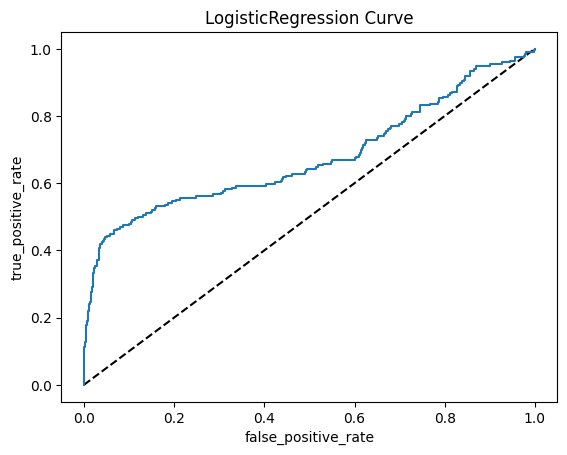

In [ ]:
from sklearn.metrics import roc_curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test,y_pred_probs)

plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title("LogisticRegression Curve")
plt.show()


# How to quantify the performace based on the graph

## We calculate the Area Under Curve

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_probs))

0.6761997417596213


# Hyper Parameter Tuning
- Ridge/lasso regresion we choose alpha

### For hyperparameter testing we 
- KNN : Choosing *n_neighbors*
- *Hyperparameters* : Parameters we specify before fitting the model
    - Like alpha and n_neighbour

## Choosing the correct hyperparameters
- Try Lots of different hyperparameter values
- Fit all of them seperately
- See how well they perform 
- Choose the best performing values

- This is called hyperparameter tuning
- using different values for hyperparameter tuning we use cross-validation to avoid overfitting to the test set
- We can still split the data and perform cross-validation on the training set
- We withold the test set for final evaluation

## One approach for hypertuning is **Grid Search Cross-Validation** 

- You define a grid of possible hyperparameter values. For example, for a KNN model, you might try different numbers of neighbors (like 3, 5, 7) and different distance metrics (like Euclidean or Manhattan).
- The grid search then trains and evaluates your model on each combination of these hyperparameters using cross-validation. This means it splits your data into parts, trains on some, tests on others, and repeats this process multiple times to get reliable results.
- After testing all combinations, it compares their performance scores and picks the hyperparameters that gave the best results.


# GridSearchCv in sickit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score , KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5,shuffle=True,random_state=42)

param_grid = {"alpha" : np.arange(0.1 , 10 , 0.1),
              "solver" : ['sag','lsqr']}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge,param_grid,cv=kf)
ridge_cv.fit(X_train,y_train)
print(ridge_cv.best_params_ , ridge_cv.best_score_)

{'alpha': np.float64(6.8), 'solver': 'sag'} 0.0360773184654767


# Limitations GridSearchCv has
- The number of fits increases and it doesnt scales well
- 3-Fold cross-validation , 1 hyperparameter , 10 total values = 30 fits
- 10 fold cross-validation , 3 hyperparameter , 30 total values = 900 fits

# Randomized Search CV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5 , shuffle=True , random_state=42)
param_grid = {'alpha' : np.arange(0.0001,1,10),
              'solver' : ['sag','lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge,param_grid,cv=kf,n_iter=2)
ridge_cv.fit(X_train,y_train)
print(ridge_cv.best_params_ , ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': np.float64(0.0001)} 0.03606720117083231


# Evaluating on the test set

In [ ]:
test_score = ridge_cv.score(X_test,y_test)
print(test_score)

0.06312903352120802


: 